In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
s_train = pd.read_csv("/content/SalaryData_Train.csv")
s_test = pd.read_csv("/content/SalaryData_Test.csv")

In [ ]:
s_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
s_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


# FEATURE SELECTION

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
array = s_train.values
X = array[:,[0, 9, 10, 11,]]
Y = array[:,-1]
# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

In [ ]:
features

# INDEPENDENT AND DEPENDENT VARIABLES

In [ ]:
X = s_train.iloc[0:30161, [0,9,10]].values
y= s_train.iloc[0:30161, -1].values

In [ ]:
X

array([[   39,  2174,     0],
       [   50,     0,     0],
       [   38,     0,     0],
       ...,
       [   58,     0,     0],
       [   22,     0,     0],
       [   52, 15024,     0]])

In [ ]:
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# ENCODING THE DATASET

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

# SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 )

# FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# ML_ALGORITHM-SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
#PREDICTING THE TEST
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# MAKING THE CONFUSION MATRIX

In [ ]:
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[5606   81]
 [1376  478]]
0.806789550457499


# TEST DATA SET

In [ ]:
sal_test = pd.get_dummies(s_test)

In [ ]:
sal_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ <=50K,Salary_ >50K
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
s_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
s_test.head(19)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
s_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
sal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Columns: 104 entries, age to Salary_ >50K
dtypes: int64(5), uint8(99)
memory usage: 2.0 MB


In [ ]:
sal_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ <=50K,Salary_ >50K
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,...,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594,0.030744,0.068592,0.731806,0.037981,0.086122,...,0.000598,0.001992,0.000863,0.000797,0.000531,0.915538,0.001262,0.000465,0.754316,0.245684
std,13.380676,2.558727,7703.181842,406.283245,12.062831,0.172628,0.252768,0.443034,0.191158,0.280554,...,0.024440,0.044589,0.029369,0.028218,0.023043,0.278089,0.035498,0.021555,0.430506,0.430506
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
A = s_test.iloc[:, [0,9,10]].values
b = s_test.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_b= LabelEncoder()
b = labelencoder_b.fit_transform(b)

In [ ]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.25, random_state = 0 )

In [ ]:
b_train

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_A = StandardScaler()
A_train = sc_A.fit_transform(A_train)
A_test = sc_A.fit_transform(A_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
#Predicting the test 
b_pred = classifier.predict(A_test)

In [ ]:
b_pred

array([0, 0, 0, ..., 0, 0, 0])

# K-FOLD CV

In [ ]:
from sklearn.model_selection import KFold
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [ ]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator = classifier, X = A_test, y = b_test, cv = kfold)
print("Accuracy: {:.2f} % " .format(accuraries.mean()*100 ))
print("Standard Deviation: {:.2f} % " .format(accuraries.std()*100))

Accuracy: 79.92 % 
Standard Deviation: 1.76 % 


# MAKING THE CONFUSION MATRIX (TEST DATA SET)

In [ ]:
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(b_test, b_pred)
acc = accuracy_score(b_test, b_pred)
print(cm)
print(acc)

[[2776   40]
 [ 696  253]]
0.8045152722443559


# GRID SEARCH CV

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel' : ['linear']},
              {'C' : [0.25, 0.5, 0.75, 1], 'kernel' : ['rbf'], 'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [ ]:
grid_search.fit(A_test, b_test)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %" .format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 80.11 %
Best Parameters: {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


# XG-BOOST

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(A_train, b_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(A_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(b_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.99%


In [ ]:
# PREDICTING THE NEW DATA POINT
new_data=pd.DataFrame({"age": 24, "capitalgain": 7688, "capitaloss": 0},index=[0])
new_data

,age,capitalgain,capitaloss
0,24,7688,0


In [ ]:
classifier.predict(new_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1])

# MLR 

In [ ]:
import statsmodels.api as sm 
X = np.append(arr = np.ones((30161,1)).astype(int), values = X, axis = 1)

In [ ]:
# BACKWARD ELIMINATION
X_opt = X[:, [0,1,2]]
X_opt = np.array(X_opt, dtype = float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1667.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:49:44   Log-Likelihood:                -15928.
No. Observations:               30161   AIC:                         3.186e+04
Df Residuals:                   30158   BIC:                         3.189e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0496      0.007     -6.790      0.000      -0.064      -0.035
x1             0.0074      0.000     41.174      0.000       0.007       0.008
x2          1.186e-05    3.2e-07     37.050      0.000    1.12e-05    1.25e-05
==============================================================================
Omnibus:                     4577.053   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6024.072
Skew:                           1.062   Prob(JB):                         0.00
Kurtosis:                       2.472   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# DATA VISUALISATIONS

In [ ]:
X = s_train.iloc[:, [0, 9]]
y = s_train.iloc[:, -1]

In [ ]:
# ENCODING THE CATEGORICAL DATA
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
# SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 )

In [ ]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
# FITTING THE MODEL
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
#Predicting the test 
y_pred = classifier.predict(X_test)

In [ ]:
# MEASURING THE ACCURACY
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[5668   19]
 [1526  328]]
0.7951200106086725


<ipython-input-50-d067a002a1b4>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


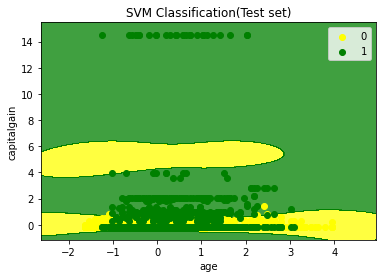

In [ ]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c= ListedColormap(('yellow', 'green'))(i), label= j)
plt.title('SVM Classification(Test set)')
plt.xlabel('age')
plt.ylabel('capitalgain')
plt.legend()
plt.show()

<ipython-input-51-0177ef66f927>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


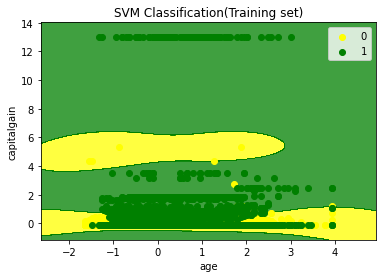

In [ ]:
#Visualizing the train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c= ListedColormap(('yellow', 'green'))(i), label= j)
plt.title('SVM Classification(Training set)')
plt.xlabel('age')
plt.ylabel('capitalgain')
plt.legend()
plt.show()